> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Once you complete this project, remove these **Tip** sections from your report before submission. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset - [Dataset-name]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
Movies are a widely popular source of entertainment that allows us to escape reality and immerse ourselves in new stories and worlds. 

By analyzing a dataset of roughly 5000 movies and examining variables such as profits, votes, and popularity, we can gain a better understanding of the elements that contribute to a movie's success and appeal, as well as how audience preferences differ across genres and topics. 

This information can be invaluable for studios and production companies in making informed decisions about movie creation that resonates with audiences and generates excitement. 
### Dataset Description 

Source of data is Kaggle - TMDB 5000 Movie Data set (cleaned from original data on Kaggle). The data set was created to answer different questions about movies such as what can be said about success of a movie, have certain production companies found a formula for success of a movie, why does a film with very high budget fail at box office and many more such questions. Some of the fields (not all) in the dataset are as follows:

- Data Description id - Integer unique id of each movie

- budget: Budget of a movie in dollars. 0 values mean unknown.

- genre: Contains all the Genres Name & TMDB Id in JSON Format

- homepage - Contains the official homepage URL of a movie. 

- imdb_id - IMDB id of a movie (string).

- original_title - The original title of a movie. The title & Original title may differ if the original title is not in English.

- popularity - Popularity of the movie in float.

- release_date - The release date of a movie in mm/dd/yy format.

- runtime - Total runtime of a movie in minutes (Integer).

- tagline - Tagline of a movie
 
- revenue - Total revenue earned by a movie in dollars.

- The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected/downloaded for analysis. Read through the description available on the homepage-links present [here](https://docs.google.com/document/d/e/2PACX-1vTlVmknRRnfy_4eTrjw5hYGaiQim5ctr9naaRd4V9du2B5bxpd8FEH3KtDgp8qVekw7Cj1GLk1IXdZi/pub?embedded=True). List all column names in each table, and their significance. In case of multiple tables, describe the relationship between tables. 


### Question(s) for Analysis

Questions I will be able to answer by data.

1. What is the  Top 15  highest grossing movies?
2. What factors (such as budget, cast, release date, etc.) are most strongly associated with a movie's financial success?
3. How have the number of movie releases changed over time?

 

In [20]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [21]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

  Using cached https://files.pythonhosted.org/packages/1d/9a/7eb9952f4b4d73fbd75ad1d5d6112f407e695957444cb695cbb3cdab918a/pandas-0.25.0-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/45/b2/6c7545bb7a38754d63048c7696804a0d947328125d81bf12beaa692c3ae3/numpy-1.19.5-cp36-cp36m-manylinux1_x86_64.whl
tensorflow 1.3.0 requires tensorflow-tensorboard<0.2.0,>=0.1.0, which is not installed.
  Found existing installation: numpy 1.12.1
    Uninstalling numpy-1.12.1:
Could not install packages due to an EnvironmentError: [Errno 13] Permission denied: 'structured_arrays.py'
Consider using the `--user` option or check the permissions.



<a id='wrangling'></a>
## Data Wrangling


### Loading the data


In [22]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
data = pd.read_csv("Database_TMDb_movie_data/tmdb-movies.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

### Data Type
- object: imdb_id, orginal_title, cast, hompage, director, tagline, keywords, overview, genres, production_companies, release_date

- Numeric: id, popularity, budget, revenue,  runtime,  vote_count, vote_average, release_year, budget_adj, revenue_adj

In [23]:
data.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

#### Check null values in each column

In [24]:
#count % null
data.isnull().sum()/len(data) * 100

id                       0.000000
imdb_id                  0.092030
popularity               0.000000
budget                   0.000000
revenue                  0.000000
original_title           0.000000
cast                     0.699429
homepage                72.979937
director                 0.404933
tagline                 25.989324
keywords                13.740107
overview                 0.036812
runtime                  0.000000
genres                   0.211669
production_companies     9.479109
release_date             0.000000
vote_count               0.000000
vote_average             0.000000
release_year             0.000000
budget_adj               0.000000
revenue_adj              0.000000
dtype: float64

So, there are some missing data in these columns: production_companies, homepage, director, tangline, keywords, genres, cast

In [25]:
# Create the summary report
data.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09



### Data Cleaning


#### Remove duplicates

In [26]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.

# showing the duplicated row 
data[data.duplicated()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


In [27]:
# dropping the duplicated rows in the dataframe
data.drop_duplicates(inplace=True)

In [28]:
# checking to see if duplicates still exist in the dataframe
data.duplicated().sum()

0

In [29]:
# getting the dataframe's shape
data.shape

(10865, 21)

#### Drop some columns

In [30]:
# dropping the imdb_id, homepage, tagline, overview, budget_adj & revenue_adj attributes
data.drop(['imdb_id','homepage','tagline','overview','budget_adj','revenue_adj'], axis=1, inplace=True)

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1: What is the  Top 15  highest grossing movies?

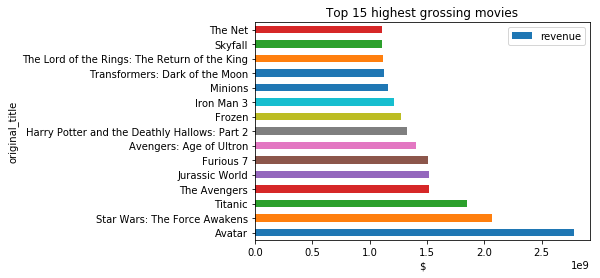

In [38]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.

sub = pd.DataFrame(data["revenue"].sort_values(ascending = False))
sub["original_title"] = data["original_title"]


plt.figure(figsize=(10,6))
sub[:15].plot.barh(x='original_title', y='revenue')
plt.title("Top 15 highest grossing movies")
plt.xlabel('$')
plt.show()

#### Answer: As you can see, Avatar is the highest-grossing film worldwide at the global box office in this dataset. The second and third are Star Wars and Titanic. The avengers became the fourth highest ighest-grossing film worldwide. 

### Research Question 2: What factors (such as budget, cast, release date, etc.) are most strongly associated with a movie's financial success??

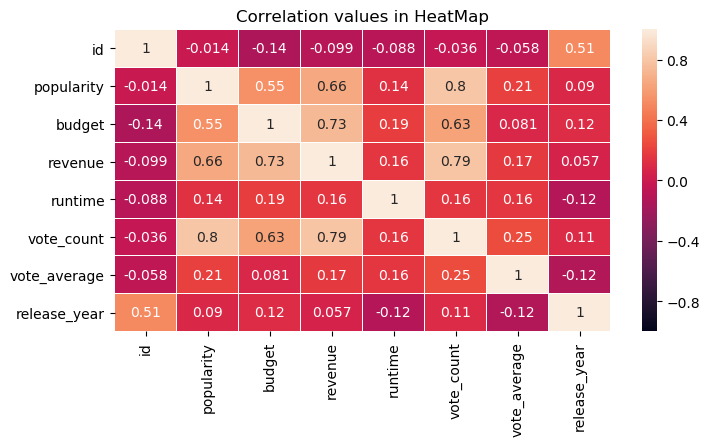

In [39]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.
# plotting a 

plt.figure(figsize = (8, 4), dpi= 100)
plt.title("Correlation values in HeatMap")
sns.heatmap(data.corr(), vmin= -1, vmax=1, linewidths=0.01, annot=True);
plt.show()

#### Answer: The correlation values in the heatmap show that popularity (0.66), budget(0.73) and vote_count(0.79) are the most influence on the film's revenue.

### Research Question 3: How have the number of movie releases changed over time?

In [40]:
# Display the movies release trend 
release_year = data.groupby('release_year').count()["id"]
release_year.head()

release_year
1960    32
1961    31
1962    32
1963    34
1964    42
Name: id, dtype: int64

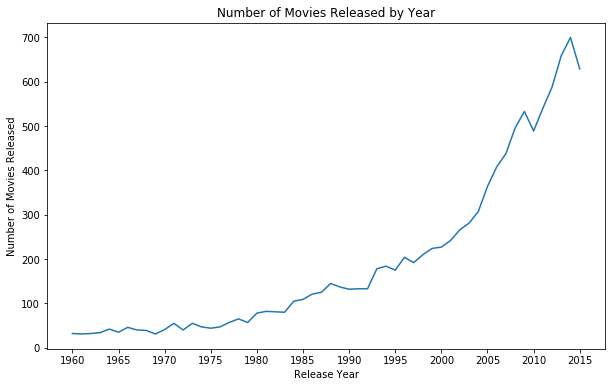

In [41]:
plt.figure(figsize=(10,6))
release_year.plot.line()
plt.title("Number of Movies Released by Year")
plt.xlabel('Release Year')
plt.ylabel('Number of Movies Released')
plt.xticks(np.arange(1960, 2016, 5))
plt.show()

#### Answer: We can observe a significant increase in the number of movies released from 1960 to 2015, with the highest number of movies being released in 2014, at approximately 700. The number of movie releases grew gradually from 1960 to 2000, and then experienced a three-fold increase from 2000 to 2014

<a id='conclusions'></a>
## Conclusions

-As you can see, Avatar is the highest-grossing film worldwide at the global box office in this dataset. The second and third are Star Wars and Titanic. The avengers became the fourth highest ighest-grossing film worldwide.

-The correlation values in the heatmap show that popularity (0.66), budget(0.73) and vote_count(0.79) are the most influence on the film's revenue. So the factors such as budget, popularity and vote_count are most strongly associated with a movie's financial success.

-We can observe a significant increase in the number of movies released from 1960 to 2015, with the highest number of movies being released in 2014, at approximately 700. The number of movie releases grew gradually from 1960 to 2000, and then experienced a three-fold increase from 2000 to 2014


### Limitations:

- I assume the revenue do not effected by inflation 


## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [42]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0